In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


/Users/pkim/Dropbox/Projects/SpringAccel


In [2]:

# Imports
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
am_i_local = "yes"
if am_i_local == "yes":
    try:
        os.chdir(os.path.join(os.getcwd(), '../SpringAccel'))
        print(os.getcwd())
    except:
        pass
from IPython.display import display

pd.options.display.max_columns = None

csv_input = 'files/july19/LA_1a.csv'
csv_output = 'files/july19/LA_1b.csv'

/Users/pkim/Dropbox/Projects/SpringAccel


In [3]:
#Read in dataset 
# Readin file from 1a 
df = pd.read_csv(csv_input)




/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,17,20,28,33,34,57,60,69,71,72,73,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Drop weird column 
try: 
       df.drop('Unnamed: 0', axis=1, inplace=True)
except: 
       print("Dropping column didn't work")
df.head()



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,2708,https://www.airbnb.com/rooms/2708,2.019071e+13,2019-07-09,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,NaN,NaN,https://a0.muscache.com/im/pictures/40618141/2...,NaN,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Los Angeles, CA, United States",Hollywood,Hollywood,NaN,Los Angeles,CA,90046,Los Angeles,"Los Angeles, CA",US,United States,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",NaN,$79.00,$399.00,$949.00,$480.00,$89.00,1.0,$0.00,28.0,366,28.0,28,366,366,28.0,366.0,2 months ago,t,5.0,29.0,29.0,238.0,2019-07-09,20.0,11.0,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""City of Los Angeles"","" CA""}",t,f,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.32,0.0
1,2732,https://www.airbnb.com/rooms/2732,2.019071e+13,2019-07-09,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,NaN,NaN,NaN,NaN,ABOUT YOU. Friendly travelers or people comin...,NaN,NaN,https://a0.muscache.com/im/pictures/1082974/0f...,NaN,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3041/profile_...,https://a0.muscache.com/im/users/3041/profile_...,Santa Monica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Santa Monica, CA, United 

In [5]:
df['isPlus'] = df['isPlus'].apply(lambda x: 1 if x == 1 else 0)

df.columns



Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'isPlus'],
      dtype='object', length=107)

In [6]:


# creates new popluation where it's either Plus listings or Superhost listings
population = df[(df['isPlus'] == 1) | (df['host_is_superhost'] == 't')]



In [7]:
population.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,2708,https://www.airbnb.com/rooms/2708,2.019071e+13,2019-07-09,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,NaN,NaN,https://a0.muscache.com/im/pictures/40618141/2...,NaN,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Los Angeles, CA, United States",Hollywood,Hollywood,NaN,Los Angeles,CA,90046,Los Angeles,"Los Angeles, CA",US,United States,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",NaN,$79.00,$399.00,$949.00,$480.00,$89.00,1.0,$0.00,28.0,366,28.0,28,366,366,28.0,366.0,2 months ago,t,5.0,29.0,29.0,238.0,2019-07-09,20.0,11.0,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""City of Los Angeles"","" CA""}",t,f,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.32,0


In [8]:
cols_to_drop = ['listing_url','scrape_id','last_scraped','experiences_offered','thumbnail_url','medium_url',
                'picture_url','xl_picture_url','host_url','host_name','host_location','host_about',
                'host_thumbnail_url', 'host_picture_url','host_neighbourhood','street','neighbourhood',
                'neighbourhood_group_cleansed','city','state','market','smart_location','country_code',
                'country_code','calendar_last_scraped','jurisdiction_names'
               ]

In [9]:
population.drop(cols_to_drop, axis=1).head(1)

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,2708,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,3008,2008-09-16,within an hour,100%,NaN,t,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Hollywood,90046,United States,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",NaN,$79.00,$399.00,$949.00,$480.00,$89.00,1.0,$0.00,28.0,366,28.0,28,366,366,28.0,366.0,2 months ago,t,5.0,29.0,29.0,238.0,20.0,11.0,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,t,f,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.32,0


In [10]:
# Missing cols removal 
num_rows = len(population)
for col_name in population.columns:
    na_tot = sum(population[col_name].isna())
    if na_tot/num_rows > 0.5:
        print(col_name, ": ", str(na_tot/num_rows))
        population.drop(col_name,axis=1,inplace=True)

thumbnail_url :  1.0
medium_url :  1.0
xl_picture_url :  1.0
host_acceptance_rate :  1.0


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


neighbourhood_group_cleansed :  1.0
square_feet :  0.9914465786314526
weekly_price :  0.8659963985594238
monthly_price :  0.8747749099639855
license :  0.968187274909964


In [11]:
population.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,2708,https://www.airbnb.com/rooms/2708,2.019071e+13,2019-07-09,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,https://a0.muscache.com/im/pictures/40618141/2...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Los Angeles, CA, United States",Hollywood,Hollywood,Los Angeles,CA,90046,Los Angeles,"Los Angeles, CA",US,United States,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1.0,$0.00,28.0,366,28.0,28,366,366,28.0,366.0,2 months ago,t,5.0,29.0,29.0,238.0,2019-07-09,20.0,11.0,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{""City of Los Angeles"","" CA""}",t,f,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.32,0


In [12]:
col_no_url_scrape = [col for col in population.columns if "url" not in col and 'scrape' not in col]
population = population[col_no_url_scrape]

In [13]:
population.head(1)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,2708,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,t,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Los Angeles, CA, United States",Hollywood,Hollywood,Los Angeles,CA,90046,Los Angeles,"Los Angeles, CA",US,United States,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1.0,$0.00,28.0,366,28.0,28,366,366,28.0,366.0,2 months ago,t,5.0,29.0,29.0,238.0,20.0,11.0,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{""City of Los Angeles"","" CA""}",t,f,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.32,0


In [14]:
text_cols = ['name','summary','space','description',
             'neighborhood_overview','notes','transit',
             'access','interaction','house_rules','host_about'
            ]
id_cols = ['id','host_id','host_name']
nlp_dataset = population[text_cols + id_cols]

In [15]:
nlp_dataset.head(1)

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_about,id,host_id,host_name
0,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,Writer.\r\nLiterary Manager.\r\nPhotographer.\...,2708,3008,Chas.


In [16]:
nlp_dataset.to_csv('files/july19/LA_nlp_ds.csv',index=False)

In [17]:
population.drop(text_cols+['host_name'], axis=1 ,inplace = True)

In [18]:
population.head(1)

,id,experiences_offered,host_id,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,2708,none,3008,2008-09-16,"Los Angeles, California, United States",within an hour,100%,t,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Los Angeles, CA, United States",Hollywood,Hollywood,Los Angeles,CA,90046,Los Angeles,"Los Angeles, CA",US,United States,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1.0,$0.00,28.0,366,28.0,28,366,366,28.0,366.0,2 months ago,t,5.0,29.0,29.0,238.0,20.0,11.0,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{""City of Los Angeles"","" CA""}",t,f,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.32,0


In [19]:
# only latitude and longitude will stay cause they can be scaled
# The other location columns need to be removed if model wants to be used for 
# other markets
location_cols = ['host_location','host_neighbourhood' ,'street','neighbourhood',
                'neighbourhood_cleansed','city','state','zipcode','market','smart_location',
                'country_code','country','jurisdiction_names']
time_cols = ['host_since','first_review','last_review']

population.drop(location_cols+time_cols, axis=1,inplace = True)


In [20]:
population.head(1)

,id,experiences_offered,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,2708,none,3008,within an hour,100%,t,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1.0,$0.00,28.0,366,28.0,28,366,366,28.0,366.0,2 months ago,t,5.0,29.0,29.0,238.0,20.0,11.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.32,0


In [21]:
constant_cols = []
for cols in population.columns:
    if len(population[cols].unique()) == 1:
        print(cols)
        constant_cols.append(cols)
population.drop(constant_cols, axis=1, inplace=True)

experiences_offered
has_availability
is_business_travel_ready


In [22]:
population.head(1)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,2708,3008,within an hour,100%,t,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1.0,$0.00,28.0,366,28.0,28,366,366,28.0,366.0,2 months ago,5.0,29.0,29.0,238.0,20.0,11.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.32,0


In [23]:
for cols in population.columns:
    if len(population[cols].unique()) == 2:
        print(cols, population[cols].unique())
        if 't' in population[cols].unique():
            population[cols] = population[cols].apply(lambda x: 1 if x =='t' else 0)[1]



host_is_superhost ['t' 'f']
host_has_profile_pic ['t' 'f']
host_identity_verified ['t' 'f']
is_location_exact ['t' 'f']
requires_license ['f' 't']
instant_bookable ['t' 'f']
require_guest_profile_picture ['f' 't']
require_guest_phone_verification ['f' 't']
isPlus [0 1]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [24]:
population.head(1)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,2708,3008,within an hour,100%,1,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,1,34.09768,-118.34602,1,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1.0,$0.00,28.0,366,28.0,28,366,366,28.0,366.0,2 months ago,5.0,29.0,29.0,238.0,20.0,11.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,strict_14_with_grace_period,0,0,2.0,0.0,2.0,0.0,0.32,0


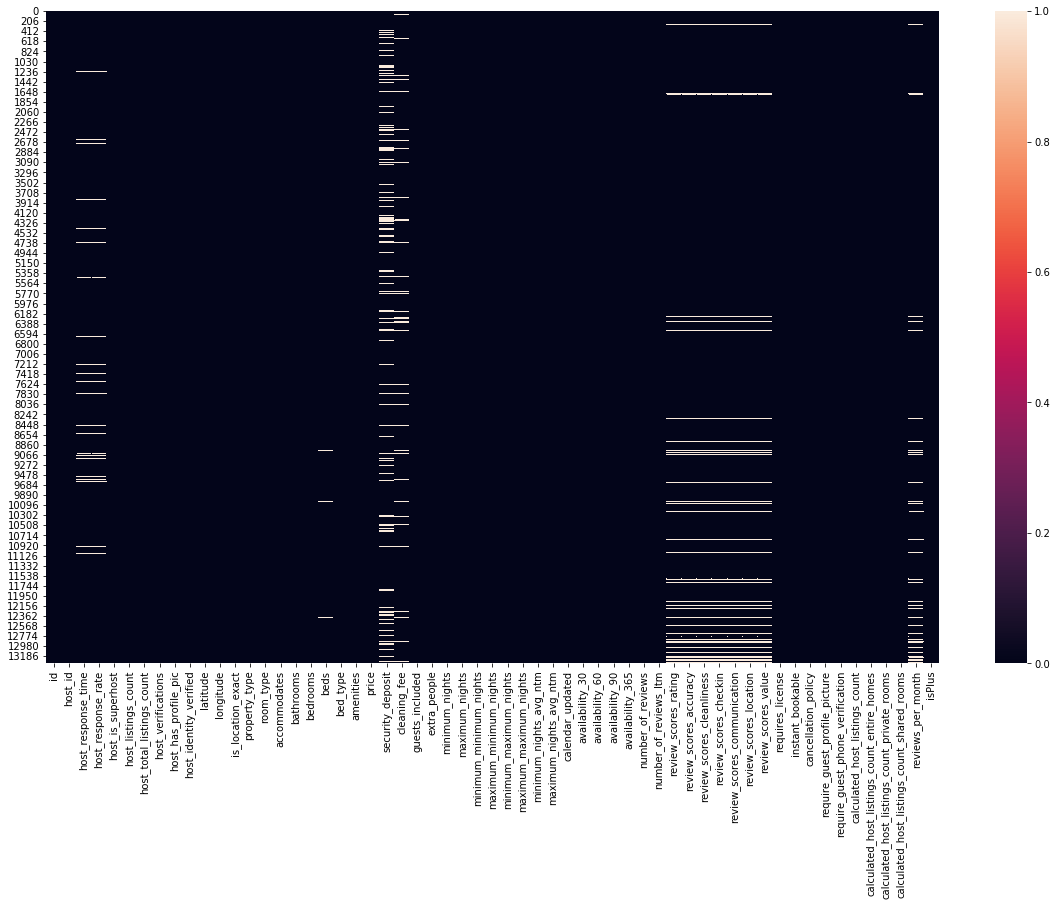

In [25]:
plt.figure(figsize=(20,12))
sns.heatmap(population.isna())



In [26]:
population['beds'].dropna().unique()

array(['1.0', '2.0', '3.0', '6.0', '5.0', '0.0', '9.0', '7.0', '4.0',
       '8.0', '10.0', '15.0', '14.0', '13.0', '16.0', '11.0', '12.0', 1.0,
       0.0, 2.0, 4.0, 3.0, 5.0, 6.0, 7.0, 10.0, 8.0, 11.0, 9.0, 13.0,
       12.0, 14.0], dtype=object)

In [27]:
population['beds'] = pd.to_numeric(population['beds'])

(array([7.000e+03, 4.657e+03, 8.770e+02, 5.720e+02, 8.700e+01, 8.400e+01,
        2.500e+01, 4.000e+00, 1.000e+01, 3.000e+00]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

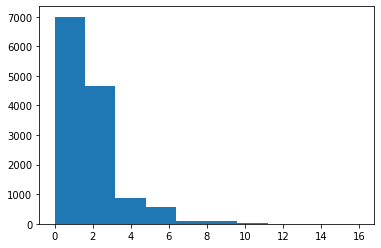

In [28]:
plt.hist(population['beds'].dropna())

In [29]:
population['beds'].loc[population['beds'].isna()]

143     NaN
8095    NaN
8989    NaN
10031   NaN
10774   NaN
11960   NaN
12123   NaN
12401   NaN
12715   NaN
Name: beds, dtype: float64

In [30]:
population.head(1)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,2708,3008,within an hour,100%,1,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,1,34.09768,-118.34602,1,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1.0,$0.00,28.0,366,28.0,28,366,366,28.0,366.0,2 months ago,5.0,29.0,29.0,238.0,20.0,11.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,strict_14_with_grace_period,0,0,2.0,0.0,2.0,0.0,0.32,0


In [31]:
# Fixing money problems 
money = ['price','security_deposit','cleaning_fee','extra_people']
for col in money:    
    population[col]=population[col].apply(lambda x: -1 if str(x)[:1] != "$" else x)
    population[col]=population[col].apply(lambda x: float(str(x)[1:].replace(',',"")
                                                         ) if len(str(x))>1 else float(-1) )


In [32]:
population[money]

,price,security_deposit,cleaning_fee,extra_people
0,79.0,480.0,89.0,0.0
1,140.0,1.0,100.0,0.0
2,75.0,100.0,25.0,15.0
3,105.0,150.0,50.0,15.0
4,303.0,200.0,100.0,15.0
5,99.0,480.0,88.0,41.0
6,48.0,0.0,35.0,10.0
7,95.0,100.0,25.0,10.0
8,129.0,1.0,45.0,45.0
9,121.0,0.0,52.0,0.0


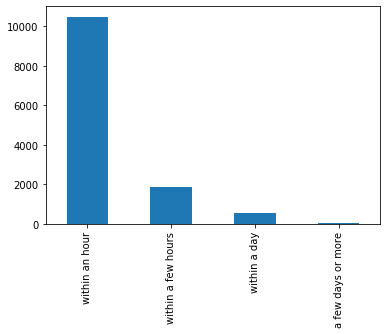

In [33]:
population['host_response_time'].value_counts().plot(kind="bar")

In [34]:
population['host_response_time'] = population['host_response_time'].apply(lambda x: str(x) if str(x) != "nan" else "within an hour")

In [35]:
population['host_response_rate'] = population['host_response_rate'].apply(lambda x: int(str(x)[:-1]) if str(x)[-1]=="%" else -1)

In [36]:
review_missing = []
for col in [cols for cols in population.columns if "review" in cols]:
    if sum(population[col].isna()) > 0:
        review_missing.append(col)
        print(sum(population[col].isna()))

743
743
743
747
745
747
748
739


In [37]:
review_missing

['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [38]:
population[review_missing]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.32
1,96.0,9.0,9.0,10.0,10.0,10.0,9.0,0.18
2,96.0,10.0,10.0,10.0,10.0,10.0,10.0,2.16
3,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1.48
4,92.0,10.0,10.0,10.0,10.0,10.0,9.0,0.96
5,95.0,10.0,10.0,10.0,10.0,9.0,9.0,0.13
6,98.0,9.0,10.0,10.0,10.0,10.0,10.0,1.40
7,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.04
8,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.85
9,94.0,10.0,10.0,10.0,10.0,10.0,9.0,3.26


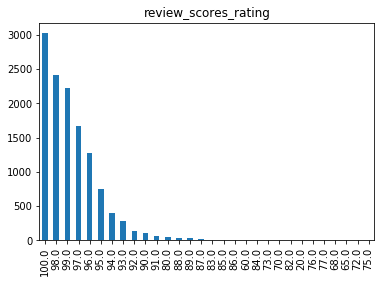

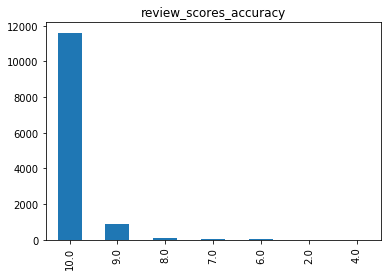

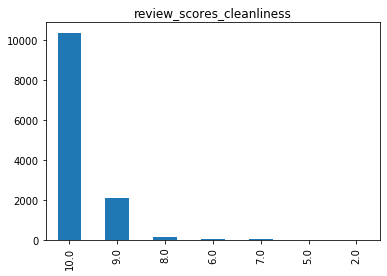

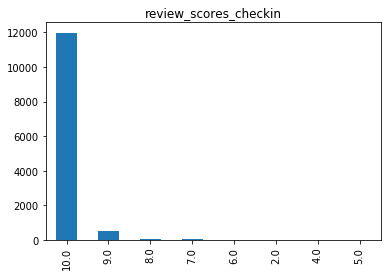

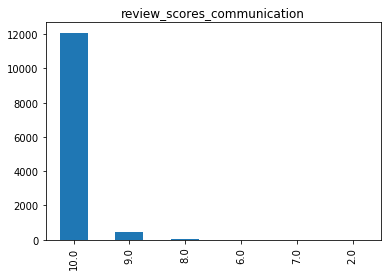

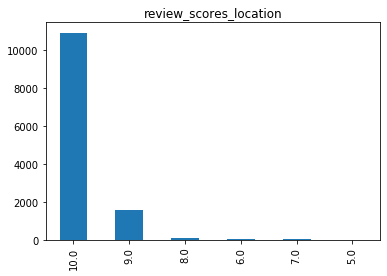

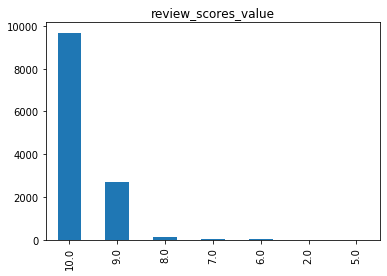

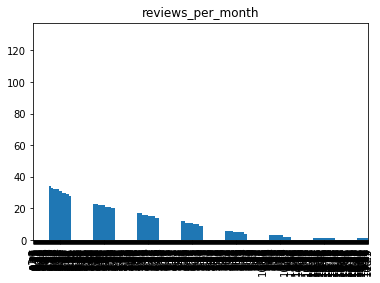

In [39]:
for col in review_missing:
    fig = plt.figure()
    plt.title(col)
    population[col].dropna().value_counts().plot(kind="bar")

(array([5.371e+03, 3.503e+03, 2.161e+03, 1.035e+03, 3.470e+02, 1.150e+02,
        3.000e+01, 1.700e+01, 7.000e+00, 3.000e+00]),
 array([1.0000e-02, 1.7950e+00, 3.5800e+00, 5.3650e+00, 7.1500e+00,
        8.9350e+00, 1.0720e+01, 1.2505e+01, 1.4290e+01, 1.6075e+01,
        1.7860e+01]),
 <a list of 10 Patch objects>)

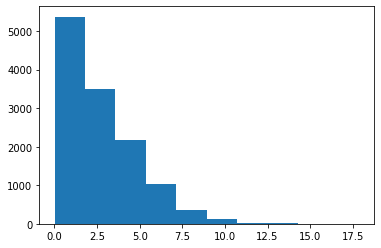

In [40]:
plt.hist(population['reviews_per_month'].dropna())

In [41]:
population.head(1)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,2708,3008,within an hour,100,1,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,1,34.09768,-118.34602,1,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",79.0,480.0,89.0,1.0,0.0,28.0,366,28.0,28,366,366,28.0,366.0,2 months ago,5.0,29.0,29.0,238.0,20.0,11.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,strict_14_with_grace_period,0,0,2.0,0.0,2.0,0.0,0.32,0


In [42]:
population.select_dtypes(include = 'object')

,id,host_id,host_response_time,host_listings_count,host_total_listings_count,host_verifications,property_type,room_type,bed_type,amenities,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,cancellation_policy
0,2708,3008,within an hour,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",Apartment,Private room,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",366,28,366,366,28.0,366.0,2 months ago,strict_14_with_grace_period
1,2732,3041,within an hour,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Apartment,Private room,Pull-out Sofa,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",180,1,180,180,1.0,180.0,6 months ago,strict_14_with_grace_period
2,5728,9171,within an hour,8.0,8.0,"['email', 'phone', 'facebook', 'reviews', 'off...",Tiny house,Private room,Real Bed,"{TV,Internet,Wifi,""Free street parking"",Heatin...",14,1,14,14,1.0,14.0,yesterday,moderate
3,5729,9171,within an hour,8.0,8.0,"['email', 'phone', 'facebook', 'reviews', 'off...",Guesthouse,Private room,Airbed,"{Internet,Wifi,""Free street parking"",Heating,""...",29,1,29,29,1.0,29.0,yesterday,moderate
4,5843,9171,within an hour,8.0,8.0,"['email', 'phone', 'facebook', 'reviews', 'off...",House,Entire home/apt,Real Bed,"{Internet,Wifi,Kitchen,""Free street parking"",H...",1120,2,1120,1120,1.1,1120.0,yesterday,moderate
5,6931,3008,within an hour,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",Apartment,Private room,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",366,28,366,366,28.0,366.0,a week ago,strict_14_with_grace_period
6,7874,21700,within an hour,3.0,3.0,"['email', 'phone', 'facebook', 'reviews']",House,Private room,Real Bed,"{Wifi,""Air conditioning"",""Free parking on prem...",730,1,730,730,1.0,730.0,4 days ago,moderate
7,7992,22363,within an hour,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",1250,1,1250,1250,1.0,1250.0,today,moderate
8,8021,22460,within an hour,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",Apartment,Private room,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",50,2,50,50,2.0,50.0,2 months ago,moderate
9,8770,26996,within a day,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Pets live on thi...",22,3,22,22,3.0,22.0,2 months ago,strict_14_with_grace_period


In [43]:
to_float = ['host_listings_count','host_total_listings_count','maximum_nights',
           'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
           'minimum_nights_avg_ntm','maximum_nights_avg_ntm']

for cols in to_float: 
    population[cols] = population[cols].astype(float)


In [44]:
population.select_dtypes(include = 'object')

,id,host_id,host_response_time,host_verifications,property_type,room_type,bed_type,amenities,calendar_updated,cancellation_policy
0,2708,3008,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",Apartment,Private room,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",2 months ago,strict_14_with_grace_period
1,2732,3041,within an hour,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Apartment,Private room,Pull-out Sofa,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",6 months ago,strict_14_with_grace_period
2,5728,9171,within an hour,"['email', 'phone', 'facebook', 'reviews', 'off...",Tiny house,Private room,Real Bed,"{TV,Internet,Wifi,""Free street parking"",Heatin...",yesterday,moderate
3,5729,9171,within an hour,"['email', 'phone', 'facebook', 'reviews', 'off...",Guesthouse,Private room,Airbed,"{Internet,Wifi,""Free street parking"",Heating,""...",yesterday,moderate
4,5843,9171,within an hour,"['email', 'phone', 'facebook', 'reviews', 'off...",House,Entire home/apt,Real Bed,"{Internet,Wifi,Kitchen,""Free street parking"",H...",yesterday,moderate
5,6931,3008,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",Apartment,Private room,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",a week ago,strict_14_with_grace_period
6,7874,21700,within an hour,"['email', 'phone', 'facebook', 'reviews']",House,Private room,Real Bed,"{Wifi,""Air conditioning"",""Free parking on prem...",4 days ago,moderate
7,7992,22363,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",today,moderate
8,8021,22460,within an hour,"['email', 'phone', 'facebook', 'reviews', 'jum...",Apartment,Private room,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",2 months ago,moderate
9,8770,26996,within a day,"['email', 'phone', 'reviews', 'kba']",Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Pets live on thi...",2 months ago,strict_14_with_grace_period


In [45]:
population.select_dtypes(include = 'float')

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,2.0,34.09768,-118.34602,1.0,1.5,1.0,1.0,79.0,480.0,89.0,1.0,0.0,28.0,366.0,28.0,28.0,366.0,366.0,28.0,366.0,5.0,29.0,29.0,238.0,20.0,11.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,0.0,2.0,0.0,0.32
1,2.0,2.0,34.00475,-118.48127,1.0,1.0,1.0,1.0,140.0,1.0,100.0,1.0,0.0,1.0,180.0,1.0,1.0,180.0,180.0,1.0,180.0,1.0,4.0,34.0,309.0,18.0,1.0,96.0,9.0,9.0,10.0,10.0,10.0,9.0,2.0,1.0,1.0,0.0,0.18
2,8.0,8.0,33.98833,-118.43224,2.0,1.0,1.0,1.0,75.0,100.0,25.0,1.0,15.0,1.0,14.0,1.0,1.0,14.0,14.0,1.0,14.0,4.0,13.0,40.0,118.0,262.0,86.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0,1.0,3.0,0.0,2.16
3,8.0,8.0,33.98685,-118.43266,3.0,1.0,1.0,2.0,105.0,150.0,50.0,2.0,15.0,1.0,29.0,1.0,1.0,29.0,29.0,1.0,29.0,1.0,4.0,15.0,97.0,178.0,72.0,96.0,10.0,9.0,10.0,10.0,10.0,9.0,4.0,1.0,3.0,0.0,1.48
4,8.0,8.0,33.98782,-118.43170,5.0,1.0,2.0,2.0,303.0,200.0,100.0,2.0,15.0,1.0,1120.0,1.0,2.0,1120.0,1120.0,1.1,1120.0,0.0,10.0,19.0,99.0,95.0,45.0,92.0,10.0,10.0,10.0,10.0,10.0,9.0,4.0,1.0,3.0,0.0,0.96
5,2.0,2.0,34.09521,-118.34801,1.0,1.5,1.0,1.0,99.0,480.0,88.0,1.0,41.0,28.0,366.0,28.0,28.0,366.0,366.0,28.0,366.0,0.0,5.0,28.0,278.0,16.0,4.0,95.0,10.0,10.0,10.0,10.0,9.0,9.0,2.0,0.0,2.0,0.0,0.13
6,3.0,3.0,33.87610,-118.11509,2.0,1.0,1.0,1.0,48.0,0.0,35.0,1.0,10.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,23.0,53.0,83.0,173.0,9.0,9.0,98.0,9.0,10.0,10.0,10.0,10.0,10.0,2.0,0.0,2.0,0.0,1.40
7,2.0,2.0,34.11543,-118.26090,4.0,1.0,1.0,2.0,95.0,100.0,25.0,2.0,10.0,1.0,1250.0,1.0,1.0,1250.0,1250.0,1.0,1250.0,3.0,7.0,21.0,21.0,191.0,83.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,2.0,0.0,0.0,2.04
8,1.0,1.0,34.06884,-118.38225,2.0,1.0,1.0,2.0,129.0,1.0,45.0,2.0,45.0,2.0,50.0,2.0,2.0,50.0,50.0,2.0,50.0,11.0,20.0,50.0,325.0,226.0,17.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.0,1.0,0.0,1.85
9,1.0,1.0,33.99399,-118.45637,2.0,1.0,0.0,1.0,121.0,0.0,52.0,1.0,0.0,3.0,22.0,3.0,3.0,22.0,22.0,3.0,22.0,11.0,33.0,60.0,335.0,382.0,23.0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,3.26


In [46]:
sum(population['host_listings_count'] !=
    population['host_total_listings_count']) 




0

In [47]:
population.drop('host_total_listings_count',axis=1,inplace=True)

In [48]:
population.head(1)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,2708,3008,within an hour,100,1,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,1,34.09768,-118.34602,1,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",79.0,480.0,89.0,1.0,0.0,28.0,366.0,28.0,28.0,366.0,366.0,28.0,366.0,2 months ago,5.0,29.0,29.0,238.0,20.0,11.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,strict_14_with_grace_period,0,0,2.0,0.0,2.0,0.0,0.32,0


In [49]:
population.select_dtypes(include = 'float')

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,34.09768,-118.34602,1.0,1.5,1.0,1.0,79.0,480.0,89.0,1.0,0.0,28.0,366.0,28.0,28.0,366.0,366.0,28.0,366.0,5.0,29.0,29.0,238.0,20.0,11.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,0.0,2.0,0.0,0.32
1,2.0,34.00475,-118.48127,1.0,1.0,1.0,1.0,140.0,1.0,100.0,1.0,0.0,1.0,180.0,1.0,1.0,180.0,180.0,1.0,180.0,1.0,4.0,34.0,309.0,18.0,1.0,96.0,9.0,9.0,10.0,10.0,10.0,9.0,2.0,1.0,1.0,0.0,0.18
2,8.0,33.98833,-118.43224,2.0,1.0,1.0,1.0,75.0,100.0,25.0,1.0,15.0,1.0,14.0,1.0,1.0,14.0,14.0,1.0,14.0,4.0,13.0,40.0,118.0,262.0,86.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0,1.0,3.0,0.0,2.16
3,8.0,33.98685,-118.43266,3.0,1.0,1.0,2.0,105.0,150.0,50.0,2.0,15.0,1.0,29.0,1.0,1.0,29.0,29.0,1.0,29.0,1.0,4.0,15.0,97.0,178.0,72.0,96.0,10.0,9.0,10.0,10.0,10.0,9.0,4.0,1.0,3.0,0.0,1.48
4,8.0,33.98782,-118.43170,5.0,1.0,2.0,2.0,303.0,200.0,100.0,2.0,15.0,1.0,1120.0,1.0,2.0,1120.0,1120.0,1.1,1120.0,0.0,10.0,19.0,99.0,95.0,45.0,92.0,10.0,10.0,10.0,10.0,10.0,9.0,4.0,1.0,3.0,0.0,0.96
5,2.0,34.09521,-118.34801,1.0,1.5,1.0,1.0,99.0,480.0,88.0,1.0,41.0,28.0,366.0,28.0,28.0,366.0,366.0,28.0,366.0,0.0,5.0,28.0,278.0,16.0,4.0,95.0,10.0,10.0,10.0,10.0,9.0,9.0,2.0,0.0,2.0,0.0,0.13
6,3.0,33.87610,-118.11509,2.0,1.0,1.0,1.0,48.0,0.0,35.0,1.0,10.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,23.0,53.0,83.0,173.0,9.0,9.0,98.0,9.0,10.0,10.0,10.0,10.0,10.0,2.0,0.0,2.0,0.0,1.40
7,2.0,34.11543,-118.26090,4.0,1.0,1.0,2.0,95.0,100.0,25.0,2.0,10.0,1.0,1250.0,1.0,1.0,1250.0,1250.0,1.0,1250.0,3.0,7.0,21.0,21.0,191.0,83.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,2.0,0.0,0.0,2.04
8,1.0,34.06884,-118.38225,2.0,1.0,1.0,2.0,129.0,1.0,45.0,2.0,45.0,2.0,50.0,2.0,2.0,50.0,50.0,2.0,50.0,11.0,20.0,50.0,325.0,226.0,17.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.0,1.0,0.0,1.85
9,1.0,33.99399,-118.45637,2.0,1.0,0.0,1.0,121.0,0.0,52.0,1.0,0.0,3.0,22.0,3.0,3.0,22.0,22.0,3.0,22.0,11.0,33.0,60.0,335.0,382.0,23.0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,3.26


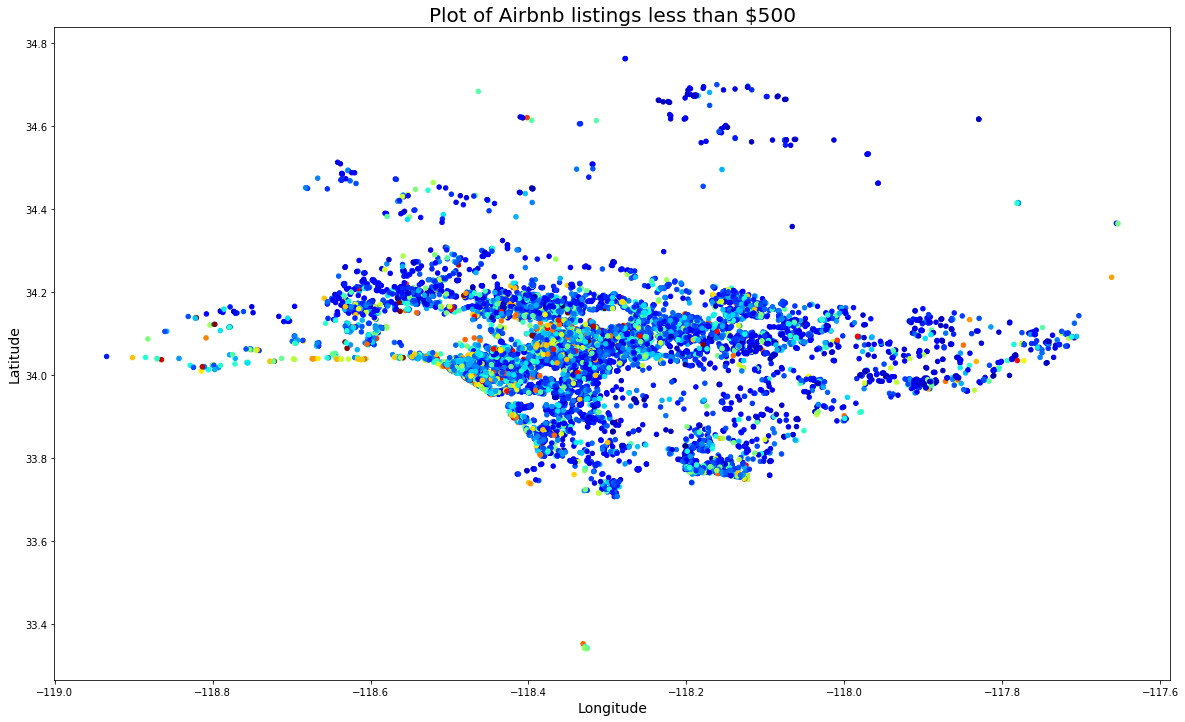

In [50]:

pop_500 = population[(population['price']<500)]
ax = pop_500.plot(kind="scatter",
           x='longitude',y='latitude',
           c='price', 
           cmap=plt.get_cmap('jet'),colorbar=False,
           figsize=(20,12)
           ).set_xlabel("Longitude", fontsize=14)
plt.title("Plot of Airbnb listings less than $500",fontsize=20)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()

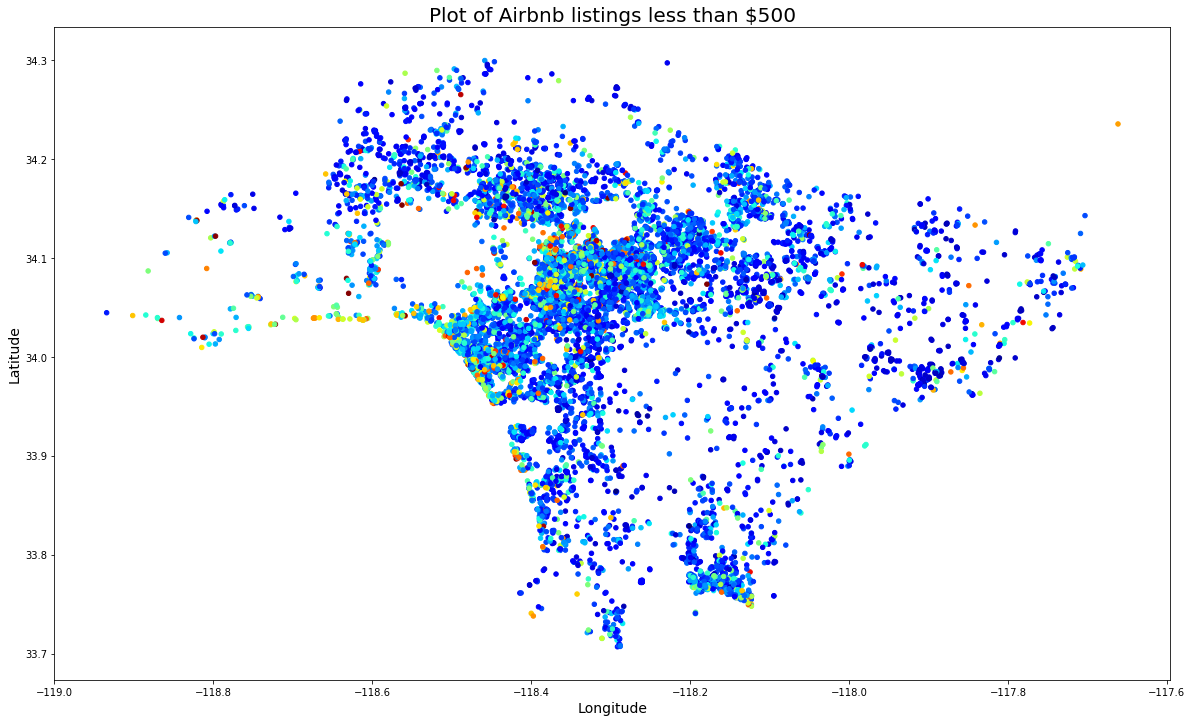

In [51]:

pop_500 = population[(population['latitude']<34.3) & (population['latitude']>33.5) & (population['price']<500)]
ax = pop_500.plot(kind="scatter",
           x='longitude',y='latitude',
           c='price', 
           cmap=plt.get_cmap('jet'),colorbar=False,
           figsize=(20,12)
           )
plt.title("Plot of Airbnb listings less than $500",fontsize=20)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()

In [52]:
population = population[(population['latitude']<34.3) & (population['latitude']>33.5)]

In [53]:
population.loc[population[population['reviews_per_month'].isna()].index]['reviews_per_month'] = 0

In [54]:
import math
population['reviews_per_month'] = population['reviews_per_month'].apply(lambda x: 0 if math.isnan(x) else x)

In [55]:
population.to_csv(csv_output)